In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uncertainties as unc
import pandas as pd
#%matplotlib notebook
plt.rcParams["font.family"] = "serif"

def parallel(*args):
    """
    Takes an array of parallel resistances and returns the equivalent resistance.
    
    --------
    Arguments: R1,R2,R3,...,Rn
    
    Returns: 1/(1/R1 + 1/R2 + ...)
    """
    return 1/sum([1/i for i in args])

In [2]:
Rin = 330 * 10**3
Rout = 15 *10**3
Vdd = 18
fco = 30
Avo = -25
Vpo = -1.8
Idss = 3.5 *10**-3
Vdsq = 6.99868
Rg = Rin
β = .00108
λ = 0.015
Rsig = 50
k = 1.96
Rl = 10**6

In [3]:
gm = - Avo/Rout

Rds = 1/gm

Vgs = lambda Vpo, λ, Idss, Vdsq, gm : 0.5*Vpo*(Vpo/Idss)*(1/(1+λ*Vdsq))*gm + Vpo

Vgsq = Vgs(Vpo, λ, Idss, Vdsq, gm)

Id = lambda Idss, Vgsq, Vpo, λ, Vdsq : Idss*(1+λ*Vdsq)*(1-Vgsq/Vpo)**2

Idq = Id(Idss, Vgsq, Vpo, λ, Vdsq)

Rs = -Vgsq/Idq

Rs = 1800

gds = Idq/((1/λ)+Vdsq)

rds = 1/gds

Rd = 1/((1/Rout)-gds)

Rd = 16800

Vd = Rd*Idq+Vdsq+Rs*Idq

Rgeq = Rg+Rsig

Rdeq = Rl + parallel(rds,Rd)

Rseqp = (rds+parallel(Rd,Rl))/(1+ gm*rds)

Rseq = parallel(Rs,Rseqp)

fCap = lambda k, Req, fco : k/(Req*fco)

Cg = fCap(k,Rgeq, fco)

Cd = fCap(k,Rdeq,fco)

Cs = fCap(k,Rseq,fco)

In [18]:
data = {'Component' : ['Rs', 'Rd', 'Rg', 'Cs', 'Cd', 'Cg'], 'Value' : [Rs, Rd, Rg, Cs, Cd, Cg]}

values = pd.DataFrame.from_dict(data)

In [19]:
print(values.to_string(index = False))

Component         Value
       Rs  1.800000e+03
       Rd  1.680000e+04
       Rg  3.300000e+05
       Cs  1.330730e-04
       Cd  6.437847e-08
       Cg  1.979498e-07


In [1]:
values

NameError: name 'values' is not defined

In [4]:
from matplotlib.ticker import MultipleLocator

In [5]:
unloaded = pd.read_excel('unloaded_data.xlsx')

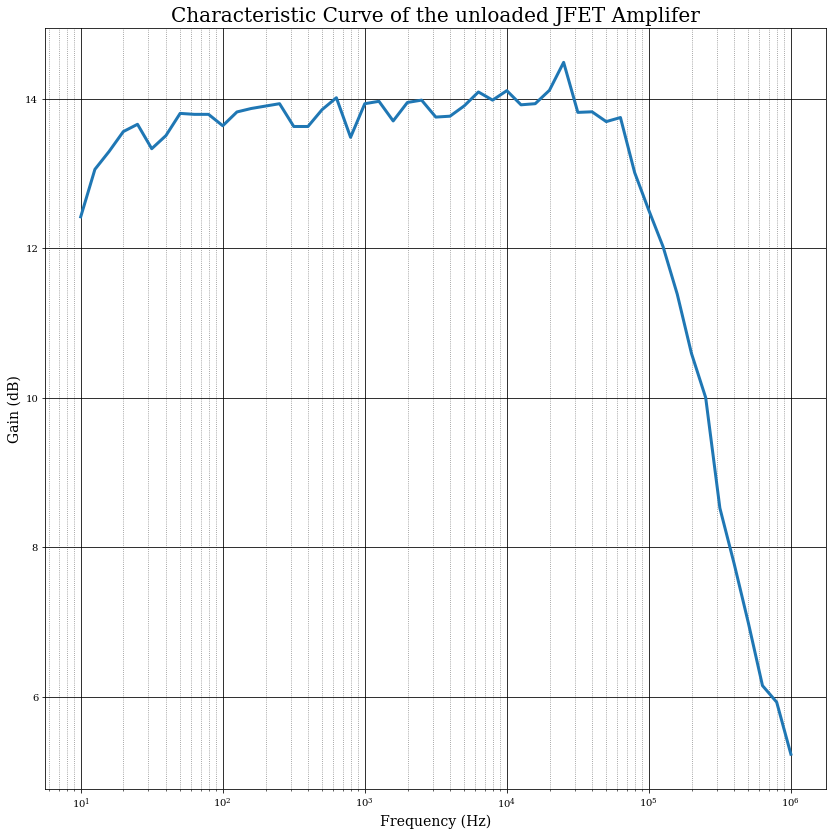

In [8]:
fig, ax = plt.subplots(1,1, figsize = (14,14))




ax.plot(unloaded['Frequency(Hz)'], unloaded['Gain (dB)'], linewidth=3)
plt.xscale('log')
ax.set_title('Characteristic Curve of the unloaded JFET Amplifer',size=20)
# Set minor tick locations.
ax.set_xlabel('Frequency (Hz)',size=14)
ax.set_ylabel('Gain (dB)',size=14)
# Set grid to use minor tick locations. 
ax.grid(which = 'minor', color='gray',linestyle = ':')
ax.grid(which = 'major', color='black')
plt.savefig('Bode_Plot_ul.png')
plt.show()

In [9]:
from bokeh.io import output_file, show, export_png, curdoc
from bokeh.layouts import widgetbox, column, row
from bokeh.models import ColumnDataSource, LabelSet, Label
from bokeh.models.widgets import DataTable, DateFormatter, TableColumn
from bokeh.plotting import figure, output_file, show
from bokeh.themes import built_in_themes
from bokeh.palettes import Viridis256, viridis

import math as m   # importing math library outside function definition saves time 
import numpy as np



output_file("potential.html")

p = figure(plot_width=1000, plot_height=1000,x_axis_type='log')

# add a circle renderer with a size, color, and alpha
p.line(unloaded['Frequency(Hz)'], unloaded['Gain (dB)'], line_width=2)
p.xaxis.axis_label = r'Frequency (Hz)'
p.yaxis.axis_label = 'Gain (dB)'


# show the results
show(p)

In [58]:
a = [i**2 for i in range(1,11)]

In [59]:
a

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

In [60]:
b = [i for i in a if i%2==0]

In [76]:
func = lambda x : x+420

In [104]:
listD = [f'{i} is even' if i%2==0 else f'{i} is odd' for i in range(11)]

In [105]:
listD

['0 is even',
 '1 is odd',
 '2 is even',
 '3 is odd',
 '4 is even',
 '5 is odd',
 '6 is even',
 '7 is odd',
 '8 is even',
 '9 is odd',
 '10 is even']